<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, to explore the effect of different features on the price of laptops. 


# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Install Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


In [ ]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import the dataset

You should download the modified version of the data set from the last module. 
Run the following code block to download the CSV file to this environment.


The functions below will download the dataset into your browser:


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [ ]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

Import the file to a pandas dataframe.


In [ ]:
df = pd.read_csv(file_name, header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface. While working on the downloaded version of this notebook on their local machines, the learners can simply **skip the steps above**, and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [4]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath)
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace= True)

Print the first 5 entries of the dataset to confirm loading.


In [8]:
df.head(5)


,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


<Axes: xlabel='CPU_frequency', ylabel='Price'>

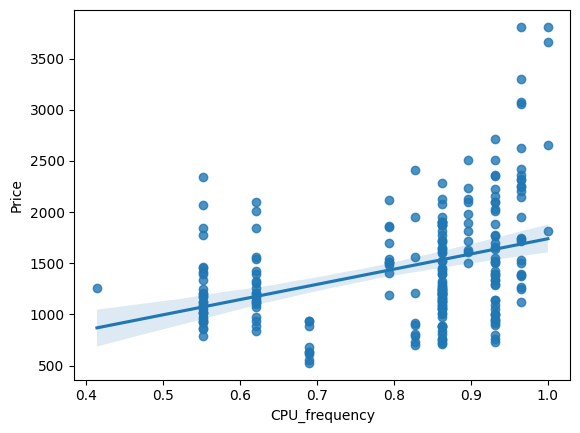

In [9]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot
sns.regplot(data=df,x="CPU_frequency",y='Price')

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
```

</details>


<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

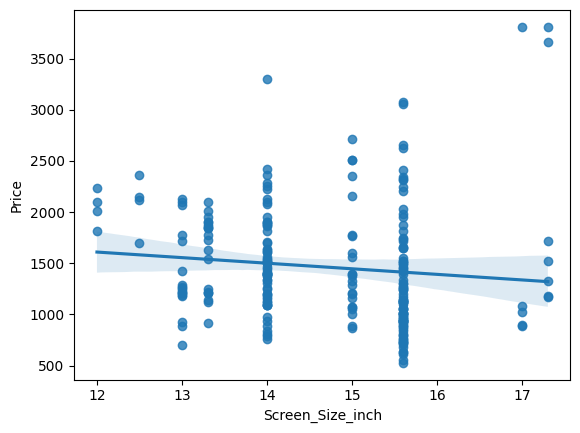

In [11]:
# Write your code below and press Shift+Enter to execute
# Screen_Size_inch plot
sns.regplot(data=df,x="Screen_Size_inch",y='Price')

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)
```

</details>


<Axes: xlabel='Weight_pounds', ylabel='Price'>

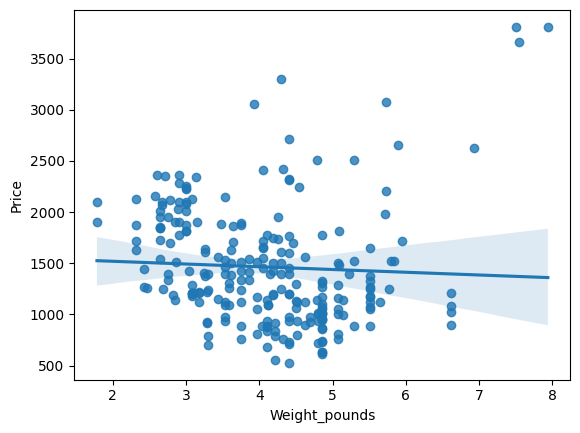

In [12]:
# Write your code below and press Shift+Enter to execute
# Weight_pounds plot
sns.regplot(data=df,x="Weight_pounds",y='Price')

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)
```

</details>


In [61]:
# Correlation values of the three attributes with Price
predictors_num = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
target = 'Price'
print(f'Pearson correlation values betwen potential predictors and the target: {target}')
for predictor in predictors_num:
        cf, p = stats.pearsonr(df[predictor], df[target])
        print(f"{predictor}:  \tcf: {cf},\t p: {p}")
df[[predictors_num[0],target]].corr()

Pearson correlation values betwen potential predictors and the target: Price
CPU_frequency:  	cf: 0.36666555892588604,	 p: 5.5024633507134316e-09
Screen_Size_inch:  	cf: -0.11064420817118269,	 p: 0.08853397846830766
Weight_pounds:  	cf: -0.05031225837751551,	 p: 0.43976938534338944


,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


<details>
    <summary>Click here for Solution</summary>

```python
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())
```

</details>


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Category", y="Price", data=df)
```

</details>


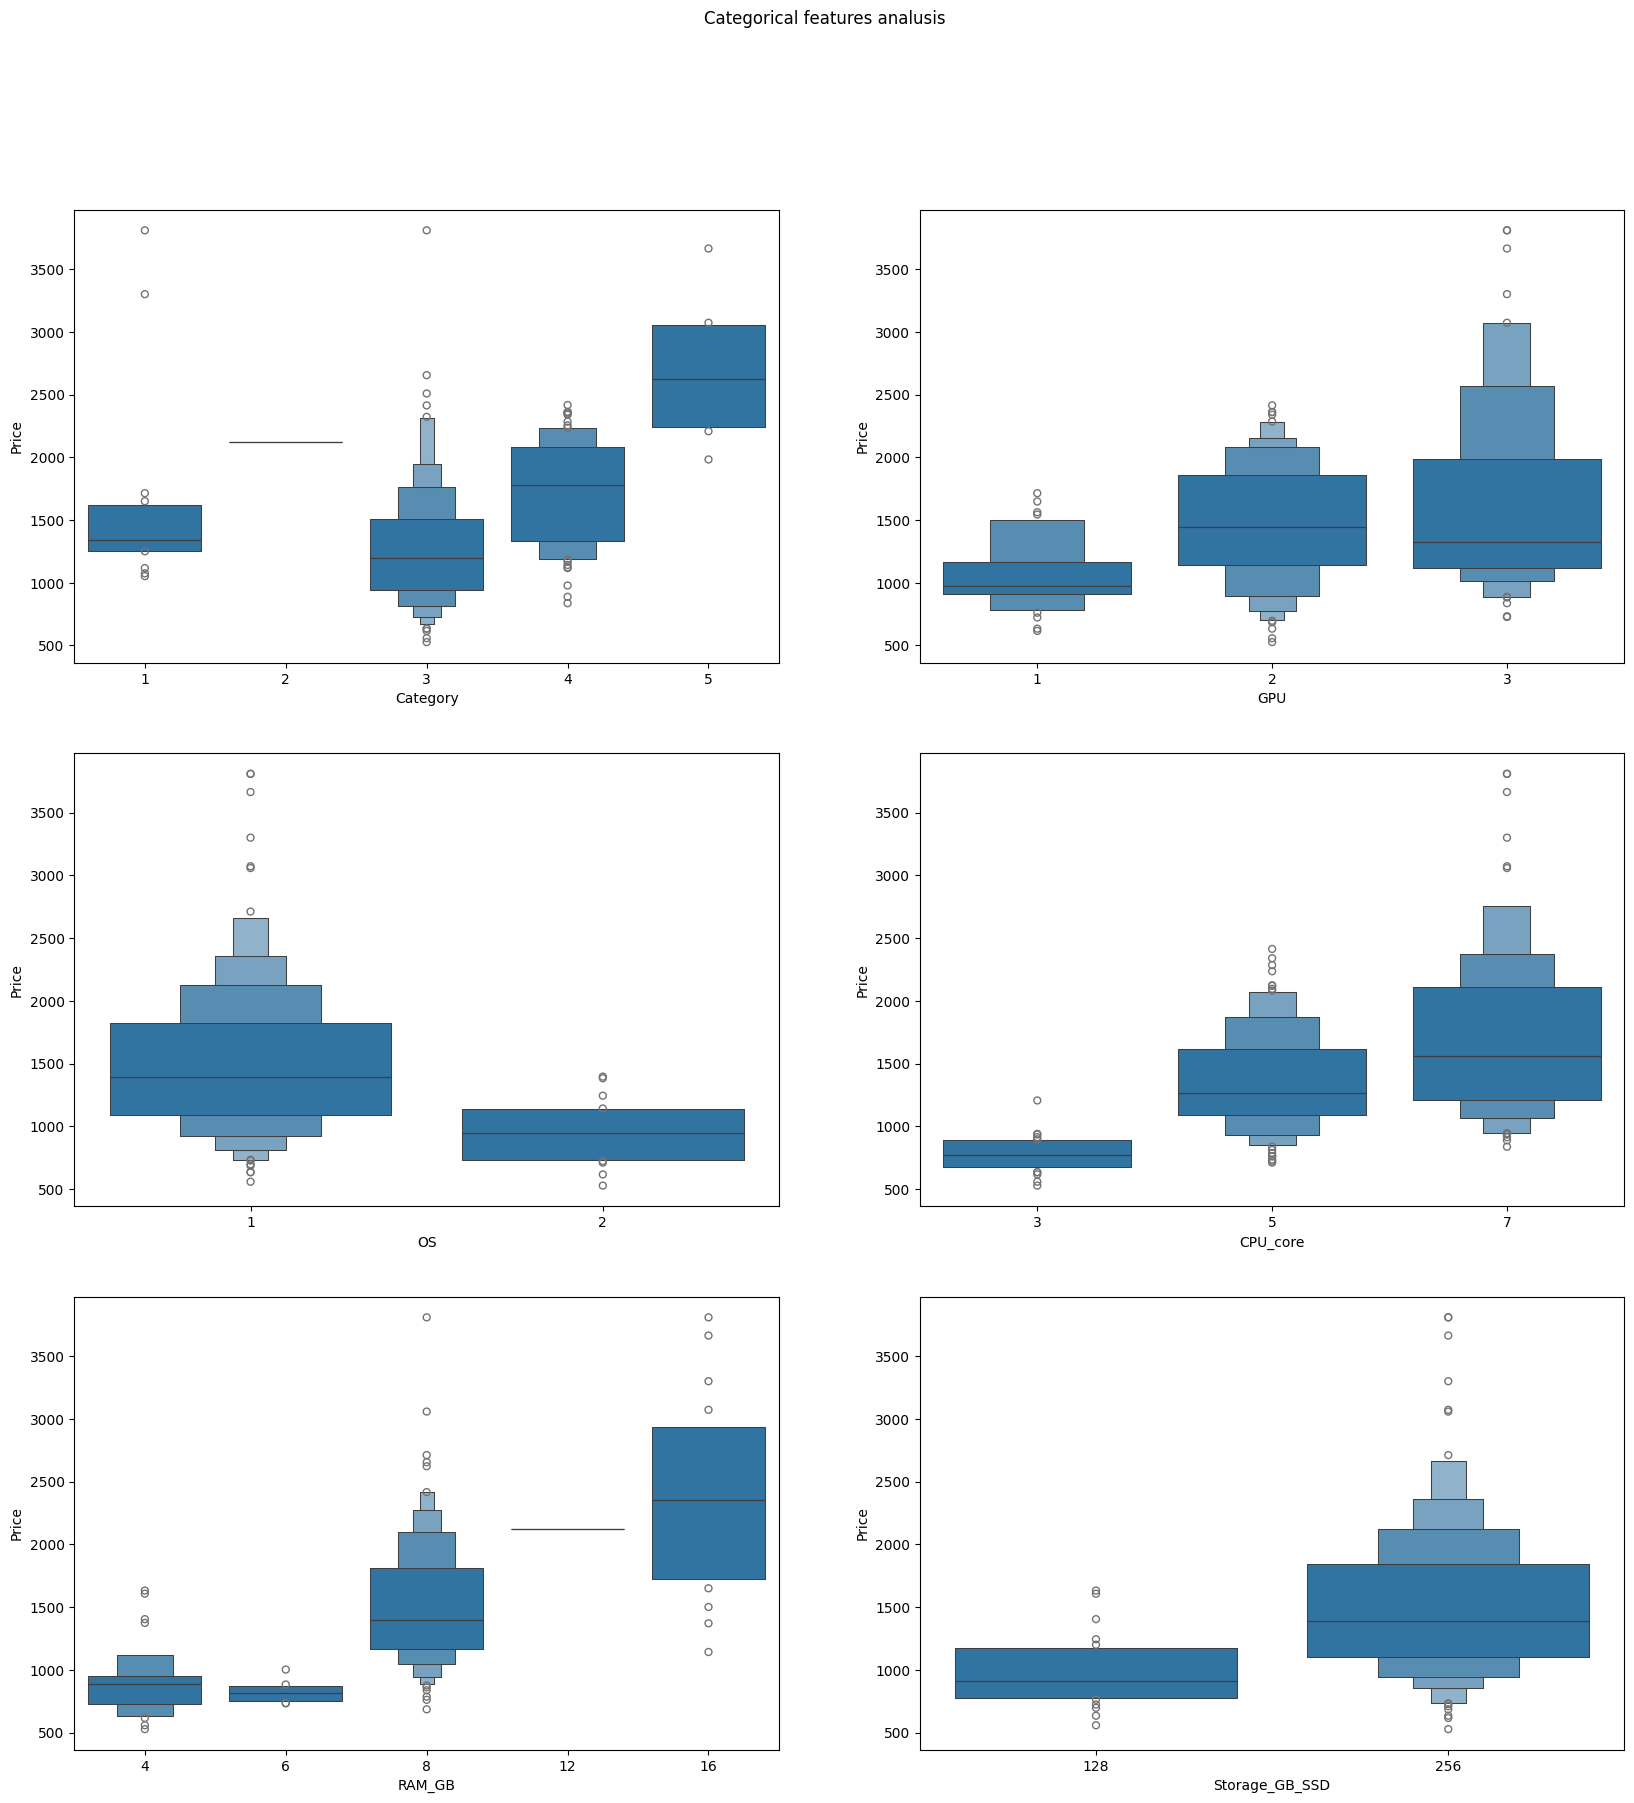

In [36]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot
predictors_cat = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
fig, axes = plt.subplots(3,2,figsize=(20,20))
fig.suptitle("Categorical features analusis")
for i, predictor in enumerate(predictors_cat):
    sns.boxenplot(data=df, x=predictors_cat[i], y=target, ax=axes[i//2,i%2])




<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="GPU", y="Price", data=df)
```

</details>


In [ ]:
# Write your code below and press Shift+Enter to execute
# OS Box plot

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="OS", y="Price", data=df)
```

</details>


In [ ]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="CPU_core", y="Price", data=df)
```

</details>


In [ ]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="RAM_GB", y="Price", data=df)
```

</details>


In [ ]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)
```

</details>


# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [40]:
# Write your code below and press Shift+Enter to execute
df.describe()


,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [41]:
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


<details>
<summary>Click here for Solution</summary>

```python
print(df.describe())
print(df.describe(include=['object']))
```

</details>


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [47]:
# Write your code below and press Shift+Enter to execute
# Create the group
grouped_df = df[['GPU', 'CPU_core', 'Price']].groupby(['GPU', 'CPU_core'],as_index=False).mean()
grouped_df.head()

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674


<details>
<summary>Click here for Solution</summary>

```python
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)
```

</details>


In [50]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table
pivot_table = grouped_df.pivot(index='GPU', columns='CPU_core')
pivot_table

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

In [55]:
pivot_table.columns.levels[1]

Index([3, 5, 7], dtype='int64', name='CPU_core')

<details>
<summary>Click here for Solution</summary>

```python
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)
```

</details>


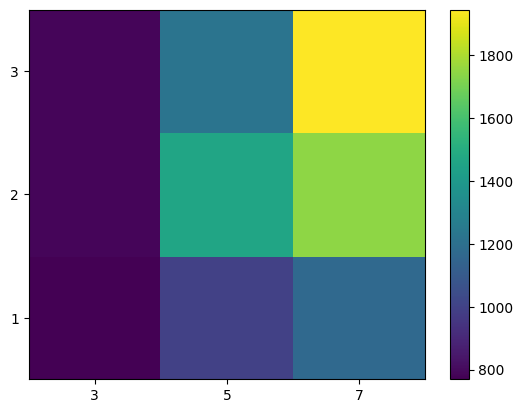

In [59]:
# Write your code below and press Shift+Enter to execute
# Create the Plot
fig, axes = plt.subplots()
im = axes.pcolor(pivot_table,)

rows = pivot_table.index
cols = pivot_table.columns.levels[1]

axes.set_xticks(np.arange(len(cols)) + 0.5, minor=False)
axes.set_xticklabels(cols,minor=False)

axes.set_yticks(np.arange(len(rows)) + 0.5, minor=False)
axes.set_yticklabels(rows,minor=False)


# plt.pcolor(pivot_table)
fig.colorbar(im)
plt.show()

<details>
<summary>Click here for Solution</summary>

```python
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
```

</details>


# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [67]:
# Write your code below and press Shift+Enter to execute
features = predictors_cat + predictors_num
target = 'Price'
print(f'Pearson correlation values betwen features and the target: {target}')
corr_dict = {'Feature': [], 'Pearson_coeff': [], 'p-value': []}
for feature in features:
        cf, p = stats.pearsonr(df[feature], df[target])
        corr_dict['Feature'].append(feature)
        corr_dict['Pearson_coeff'].append(cf)
        corr_dict['p-value'].append(p)
        # print(f"{feature}:  \t\tcf: {cf},\t p: {p}")
corr_df = pd.DataFrame(corr_dict)
corr_df

Pearson correlation values betwen features and the target: Price


,Feature,Pearson_coeff,p-value
0,Category,0.286243,7.225696e-06
1,GPU,0.288298,6.166950e-06
2,OS,-0.221730,5.696643e-04
3,CPU_core,0.459398,7.912950e-14
4,RAM_GB,0.549297,3.681561e-20
5,Storage_GB_SSD,0.243421,1.489892e-04
6,CPU_frequency,0.366666,5.502463e-09
7,Screen_Size_inch,-0.110644,8.853398e-02
8,Weight_pounds,-0.050312,4.397694e-01


<details>
<summary>Click here for Solution</summary>

```python
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
```

</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
